# Imports etc.

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
import statsmodels.formula.api as smf
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[rule_data.phase == 'high'][:30]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
0,13885,high,0,"[0, 1]","[3, 0]",NaN,"[3, 0]","[0, 1]",NaN,NaN,"[3, 0]",NaN,NaN
3,14239,high,0,"[3, 0]","[1, 0]",NaN,"[1, 3]","[3, 0]",NaN,NaN,NaN,"[1, 0]","[1, 3]"
5,15670,high,0,"[3, 0]","[0, 3]",NaN,"[0, 3]","[3, 0]",NaN,NaN,"[0, 3]",NaN,NaN
6,16849,high,0,"[1, 2]","[3, 0]",NaN,"[2, 0]","[1, 2]",NaN,NaN,NaN,"[3, 0]","[2, 0]"
9,23638,high,0,"[0, 1]","[0, 2]",NaN,"[0, 2]","[0, 1]",NaN,NaN,"[0, 2]",NaN,NaN
10,24817,high,0,"[3, 0]","[2, 0]",NaN,"[2, 3]","[3, 0]",NaN,NaN,NaN,"[2, 0]","[2, 3]"
12,24964,high,0,"[2, 3]","[1, 0]",NaN,"[1, 0]","[2, 3]",NaN,NaN,"[1, 0]",NaN,NaN
15,24979,high,0,"[2, 3]","[3, 2]",NaN,"[3, 2]","[2, 3]",NaN,NaN,"[3, 2]",NaN,NaN
17,26179,high,0,"[1, 2]","[1, 3]",NaN,"[1, 3]","[1, 2]",NaN,NaN,"[1, 3]",NaN,NaN
19,26230,high,0,"[2, 3]","[2, 0]",NaN,"[2, 0]","[2, 3]",NaN,NaN,"[2, 0]",NaN,NaN


In [4]:
interesting_cols = [
#     'sid',
    'trial_type', 'phase', 'block', 'trial', 'trial_', 'subtrial', 'points', 'rt', #'key_press',
    'action_id', 'action_name', 'middle_item', 'middle_item_name', 'goal_star', 'goal_star_name', 'correct', 'unlocked_star',
    'unlocked_star_name', 'timeout', 'star_iteration',
#     'middle_item_lowTransferRules', 'middle_item_lowRules', 'bool_middle_item_lowRules',
#     'unlocked_star_highTransferRules', 'unlocked_star_highRules', 'bool_unlocked_star_highRules',
    'chance_performer',
]

In [5]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
all_data

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (66,67) have mixed types.Specify dtype option on import or set low_memory=False.


,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,count_star3,star_rule,star0_inplace,star1_inplace,star2_inplace,star3_inplace,sex,age_years,age_months,chance_performer
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290971,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,7.0,23.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290972,884.860,0.0,79.0,transfer,2790.0,1240253.0,0.0-595.0-0.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290973,203.660,0.0,80.0,transfer,2791.0,1240463.0,0.0-595.0-1.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290974,262.600,0.0,73.0,transfer,2792.0,1240731.0,0.0-595.0-2.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True


# Results

In [6]:
id_cols_trial = ['sid', 'trial_type', 'phase', 'phaseNum', 'trial']
id_cols_block = ['sid', 'trial_type', 'phase', 'phaseNum', 'block']

learn_curves_trial = all_data.groupby(id_cols_trial).aggregate('mean').reset_index()[id_cols_trial + ['acc']]
learn_curves_block = all_data.groupby(id_cols_block).aggregate('mean').reset_index()[id_cols_block + ['acc']]
learn_curves_trial

,sid,trial_type,phase,phaseNum,trial,acc
0,13885,learning,high,0.0,0.0,0.166667
1,13885,learning,high,0.0,1.0,0.250000
2,13885,learning,high,0.0,2.0,0.333333
3,13885,learning,high,0.0,3.0,0.416667
4,13885,learning,high,0.0,4.0,0.333333
...,...,...,...,...,...,...
5595,39925,transfer,low,0.0,20.0,0.000000
5596,39925,transfer,low,0.0,21.0,0.000000
5597,39925,transfer,low,0.0,22.0,0.000000
5598,39925,transfer,low,0.0,23.0,0.000000


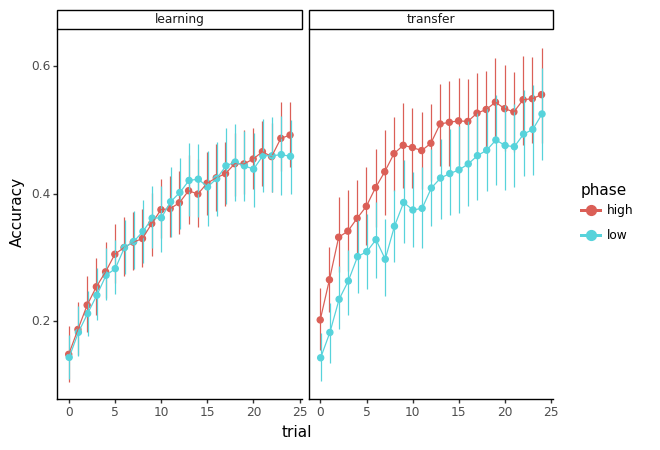

<ggplot: (150136157194)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_PerformanceOverTrials.png


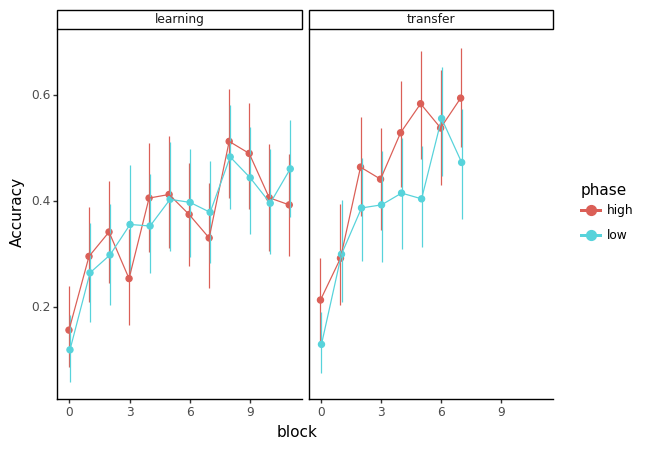

<ggplot: (150136157194)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_PerformanceOverBlocks.png


In [7]:
# Plot performance over trials (averaged over blocks)
g = (gg.ggplot(learn_curves_trial, gg.aes('trial', 'acc', color='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.facet_grid('~ trial_type')
     + gg.labs(y='Accuracy')
    )
print(g)
g.save(os.path.join(plot_dir, '103_PerformanceOverTrials.png'))

# Plot performance over blocks (averaged over trials)
g += gg.aes(x='block')
g.data = learn_curves_block
print(g)
g.save(os.path.join(plot_dir, '103_PerformanceOverBlocks.png'))

In [34]:
m_dat = learn_curves_trial.loc[learn_curves_trial['trial_type'] == 'transfer']
mod = smf.mixedlm('acc ~ trial * phase', m_dat, groups=m_dat['sid']).fit()
mod.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:               MixedLM  Dependent Variable:  acc       
No. Observations:    5600     Method:              REML      
No. Groups:          56       Scale:               0.0823    
Min. group size:     100      Log-Likelihood:      -1074.4899
Max. group size:     100      Converged:           Yes       
Mean group size:     100.0                                   
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.316    0.026 12.252 0.000  0.265  0.366
phase[T.low]       -0.095    0.015 -6.393 0.000 -0.124 -0.066
trial               0.012    0.001 15.698 0.000  0.010  0.013
trial:phase[T.low]  0.002    0.001  1.587 0.113 -0.000  0.004
Group Var           0.031    0.021                           
=============================================================

"""

In [8]:
id_cols_trial = ['sid', 'trial_type', 'phase', 'phaseNum', 'trial', 'goal_star']
id_cols_block = ['sid', 'trial_type', 'phase', 'phaseNum', 'block', 'goal_star']

learn_curves_trial = all_data.groupby(id_cols_trial).aggregate('mean').reset_index()[id_cols_trial + ['acc']]
learn_curves_block = all_data.groupby(id_cols_block).aggregate('mean').reset_index()[id_cols_block + ['acc']]
learn_curves_trial

,sid,trial_type,phase,phaseNum,trial,goal_star,acc
0,13885,learning,high,0.0,0.0,0.0,0.000000
1,13885,learning,high,0.0,0.0,1.0,0.333333
2,13885,learning,high,0.0,0.0,2.0,0.333333
3,13885,learning,high,0.0,0.0,3.0,0.000000
4,13885,learning,high,0.0,1.0,0.0,0.666667
...,...,...,...,...,...,...,...
16795,39925,transfer,low,0.0,22.0,2.0,0.000000
16796,39925,transfer,low,0.0,23.0,1.0,0.000000
16797,39925,transfer,low,0.0,23.0,2.0,0.000000
16798,39925,transfer,low,0.0,24.0,1.0,0.000000


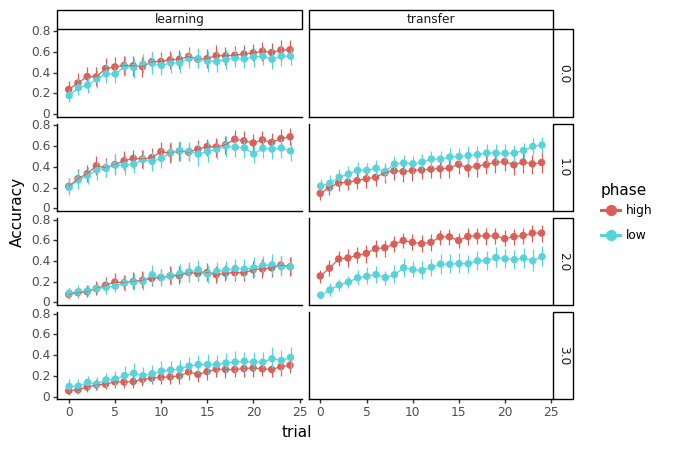

<ggplot: (150128718379)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_PerformanceOverTrials_byGoalStar.png


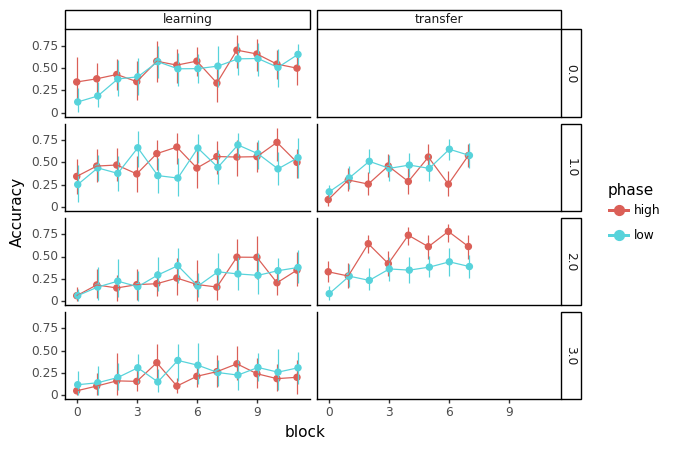

<ggplot: (150128718379)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_PerformanceOverBlocks_byGoalStar.png


In [9]:
# Plot performance over trials (averaged over blocks)
g = (gg.ggplot(learn_curves_trial, gg.aes('trial', 'acc', color='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.facet_grid('goal_star ~ trial_type')
     + gg.labs(y='Accuracy')
    )
print(g)
g.save(os.path.join(plot_dir, '103_PerformanceOverTrials_byGoalStar.png'))

# Plot performance over blocks (averaged over trials)
g += gg.aes(x='block')
g.data = learn_curves_block
print(g)
g.save(os.path.join(plot_dir, '103_PerformanceOverBlocks_byGoalStar.png'))

## Perseverance: Following old rules after transfer

In [10]:
id_vars_block = ['sid', 'block', 'phase', 'trial_type', 'phaseNum']
id_vars_trial = ['sid', 'trial', 'phase', 'trial_type', 'phaseNum']

melt_vars_low = ['bool_middle_item_lowRulesLearnOnly', 'bool_middle_item_lowRulesTransferOnly', 'bool_middle_item_lowRulesBoth']
melt_vars_high = ['bool_unlocked_star_highRulesLearnOnly', 'bool_unlocked_star_highRulesTransferOnly', 'bool_unlocked_star_highRulesBoth']

In [11]:
def get_melt_dat(all_data, id_vars, melt_vars):
    
    # Which subtrials for high and low rules?
    if 'low' in melt_vars[0]:
        subtrials = [1, 3]
    else:
        subtrials = [3]
        
    # Average each participant
    sum_dat = all_data.loc[all_data.subtrial.isin(subtrials), id_vars + melt_vars].groupby(id_vars).aggregate('mean').reset_index()
    
    # Split learn and transfer performance into two separate rows to be able to plot them together
    melt_dat = sum_dat.melt(id_vars=id_vars)
    
    return melt_dat

# Example use
get_melt_dat(all_data, id_vars_block, melt_vars_low)

,sid,block,phase,trial_type,phaseNum,variable,value
0,13885,0.0,high,learning,0.0,bool_middle_item_lowRulesLearnOnly,0.00
1,13885,0.0,high,transfer,0.0,bool_middle_item_lowRulesLearnOnly,0.00
2,13885,0.0,low,learning,1.0,bool_middle_item_lowRulesLearnOnly,0.22
3,13885,0.0,low,transfer,1.0,bool_middle_item_lowRulesLearnOnly,0.26
4,13885,1.0,high,learning,0.0,bool_middle_item_lowRulesLearnOnly,0.00
...,...,...,...,...,...,...,...
6715,39925,9.0,low,learning,0.0,bool_middle_item_lowRulesBoth,0.46
6716,39925,10.0,high,learning,1.0,bool_middle_item_lowRulesBoth,0.34
6717,39925,10.0,low,learning,0.0,bool_middle_item_lowRulesBoth,0.20
6718,39925,11.0,high,learning,1.0,bool_middle_item_lowRulesBoth,0.66


In [12]:
def combine_low_high(all_data, id_vars):
    
    dat_low = get_melt_dat(all_data, id_vars, melt_vars_low)
    dat_low = dat_low.loc[dat_low['phase'] == 'low']

    dat_high = get_melt_dat(all_data, id_vars, melt_vars_high)
    dat_high = dat_high.loc[dat_high['phase'] == 'high']

    dat_both = pd.concat([dat_low, dat_high])
    dat_both['rulePhase'] = dat_both['variable'].apply(lambda x : x.split('_')[-1].split('Rules')[1])
    
    return dat_both

# Example use
combine_low_high(all_data, id_vars_trial)

,sid,trial,phase,trial_type,phaseNum,variable,value,rulePhase
2,13885,0.0,low,learning,1.0,bool_middle_item_lowRulesLearnOnly,0.125000,LearnOnly
3,13885,0.0,low,transfer,1.0,bool_middle_item_lowRulesLearnOnly,0.125000,LearnOnly
6,13885,1.0,low,learning,1.0,bool_middle_item_lowRulesLearnOnly,0.291667,LearnOnly
7,13885,1.0,low,transfer,1.0,bool_middle_item_lowRulesLearnOnly,0.187500,LearnOnly
10,13885,2.0,low,learning,1.0,bool_middle_item_lowRulesLearnOnly,0.416667,LearnOnly
...,...,...,...,...,...,...,...,...
16789,39925,22.0,high,transfer,1.0,bool_unlocked_star_highRulesBoth,0.000000,Both
16792,39925,23.0,high,learning,1.0,bool_unlocked_star_highRulesBoth,0.166667,Both
16793,39925,23.0,high,transfer,1.0,bool_unlocked_star_highRulesBoth,0.000000,Both
16796,39925,24.0,high,learning,1.0,bool_unlocked_star_highRulesBoth,0.166667,Both


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_RuleUseOverTrials.png


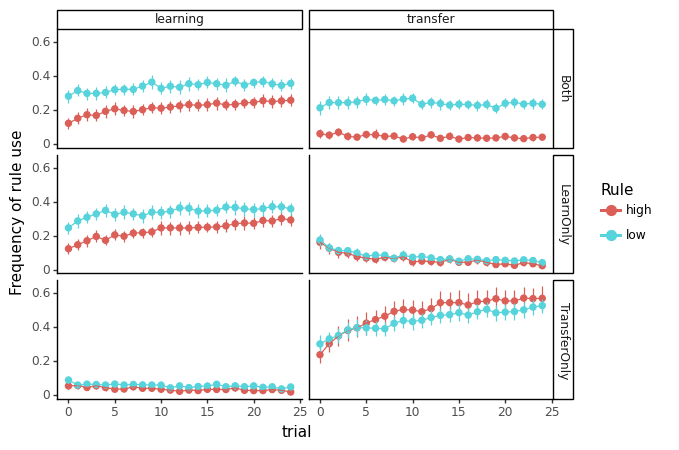

<ggplot: (150136975743)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_RuleUseOverBlocks.png


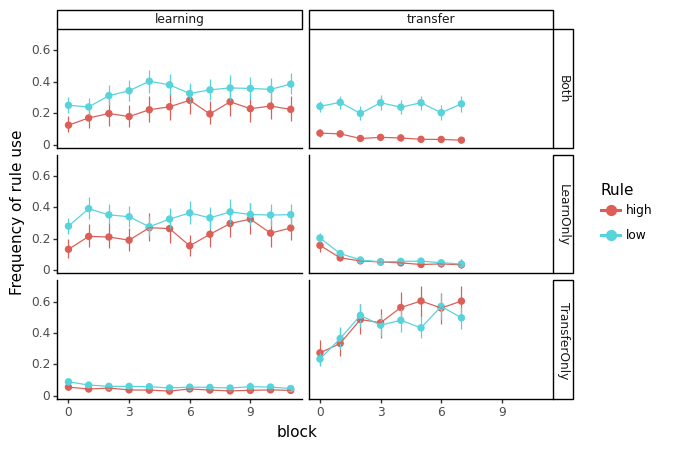

<ggplot: (150136975743)>


In [13]:
# Get data
trial_dat = combine_low_high(all_data, id_vars_trial)
block_dat = combine_low_high(all_data, id_vars_block)

# Plot rule use over Trials (averaged over blocks)
g = (gg.ggplot(trial_dat, gg.aes('trial', 'value', color='phase'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('rulePhase ~ trial_type')
     + gg.labs(y='Frequency of rule use', color='Rule')
    )
g.save(os.path.join(plot_dir, '103_RuleUseOverTrials.png'))
print(g)

# Plot rule use over Blocks (averaged over trials)
g += gg.aes(x='block')
g.data = block_dat
g.save(os.path.join(plot_dir, '103_RuleUseOverBlocks.png'))
print(g)

In [14]:
# Stats:
    # transfer, LearnOnly: rule low minus rule high <- trial * block (or just t-test for each block, see how long the difference lasts)
    # => low rules are forgotten more slowly (is this true?)
    # transfer, TransferOnly: rule high minus rule low <- trial * block (or just t-test for each block)
    # => low rules are learned 

# RTs

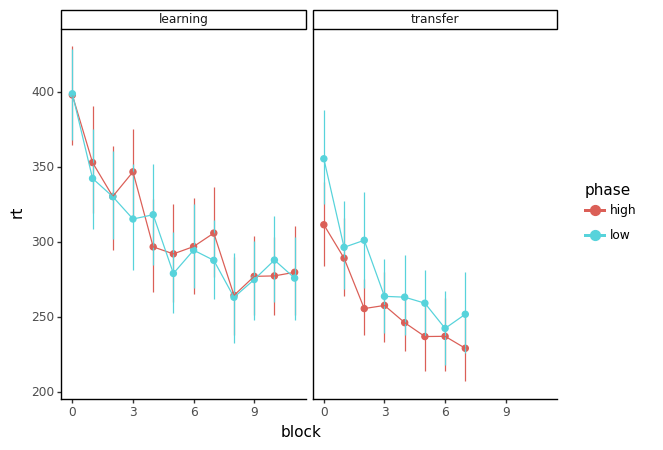

<ggplot: (150136342944)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_RtOverBlock.png


In [15]:
block_dat = all_data.groupby(['sid', 'block', 'phase', 'trial_type']).aggregate('mean').reset_index()

g = (gg.ggplot(block_dat, gg.aes('block', 'rt', color='phase'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid(' ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '103_RtOverBlock.png'))

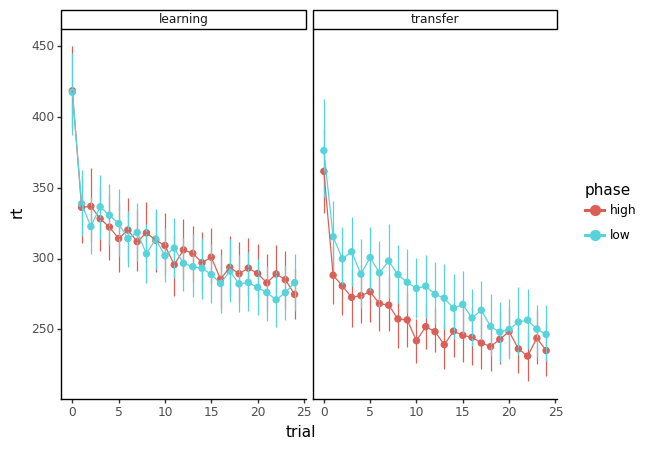

<ggplot: (150136342944)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_RtOverTrial.png


In [16]:
trial_dat = all_data.groupby(['sid', 'trial', 'phase', 'trial_type']).aggregate('mean').reset_index()

g += gg.aes(x='trial')
g.data = trial_dat
print(g)
g.save(os.path.join(plot_dir, '103_RtOverTrial.png'))

In [35]:
m_dat = trial_dat.loc[trial_dat['trial_type'] == 'transfer']
mod = smf.mixedlm('rt ~ trial * phase', m_dat, groups=m_dat['sid']).fit()
mod.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:               MixedLM    Dependent Variable:    rt         
No. Observations:    2800       Method:                REML       
No. Groups:          56         Scale:                 3194.5509  
Min. group size:     50         Log-Likelihood:        -15378.0120
Max. group size:     50         Converged:             Yes        
Mean group size:     50.0                                         
------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------------
Intercept           291.390    8.555  34.061 0.000 274.622 308.157
phase[T.low]         28.181    4.147   6.795 0.000  20.052  36.310
trial                -2.820    0.209 -13.463 0.000  -3.231  -2.410
trial:phase[T.low]   -0.596    0.296  -2.012 0.044  -1.177  -0.015
Group Var          3616.793   12.539                              
==================================================================

"""

In [17]:
def get_diff_dat(dat, cols):

    learn_dat = dat.loc[dat['trial_type'] == 'learning']
    trans_dat = dat.loc[dat['trial_type'] == 'transfer']

    cols = cols + ['sid', 'phase', 'rt']
    diff_dat = pd.merge(learn_dat[cols], trans_dat[cols], on=cols[:-1], suffixes=['_learn', '_trans'])
    diff_dat['rt_trans_minus_learn'] = diff_dat['rt_trans'] - diff_dat['rt_learn']
    
    return diff_dat

# Example use
get_diff_dat(trial_dat, ['trial'])

,trial,sid,phase,rt_learn,rt_trans,rt_trans_minus_learn
0,0.0,13885,high,319.401667,415.855357,96.453690
1,0.0,13885,low,324.727604,344.356250,19.628646
2,1.0,13885,high,261.198750,276.646250,15.447500
3,1.0,13885,low,252.538438,282.575000,30.036563
4,2.0,13885,high,229.949062,313.366563,83.417500
...,...,...,...,...,...,...
2795,22.0,39925,low,316.204792,293.624375,-22.580417
2796,23.0,39925,high,339.926458,329.840469,-10.085990
2797,23.0,39925,low,335.193958,265.575000,-69.618958
2798,24.0,39925,high,274.263958,320.638594,46.374635


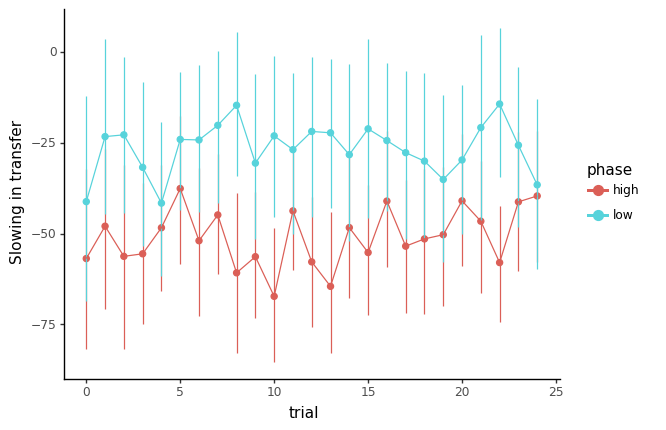

<ggplot: (150137586679)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_speedlossOverTrial.png


In [18]:
diff_dat_trial = get_diff_dat(trial_dat, ['trial'])
diff_dat_block = get_diff_dat(block_dat, ['block'])

g = (gg.ggplot(diff_dat_trial, gg.aes('trial', 'rt_trans_minus_learn', color='phase'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.labs(y='Slowing in transfer')
    )
print(g)
g.save(os.path.join(plot_dir, '103_speedlossOverTrial.png'))

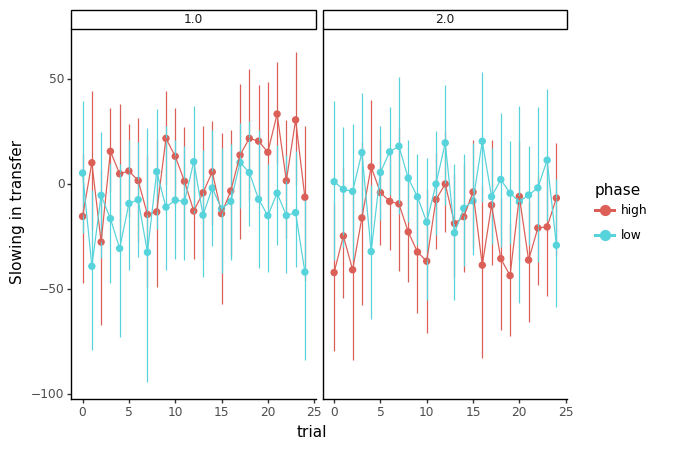

<ggplot: (150135051987)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_transferSlowingOverTrialByStar.png


In [19]:
trial_dat_ = all_data.groupby(['sid', 'trial', 'phase', 'trial_type', 'goal_star']).aggregate('mean').reset_index()
diff_dat_trial_star = get_diff_dat(trial_dat_, ['trial', 'goal_star'])

g_ = g + gg.facet_grid('~ goal_star')
g_.data = diff_dat_trial_star
print(g_)
g_.save(os.path.join(plot_dir, '103_transferSlowingOverTrialByStar.png'))

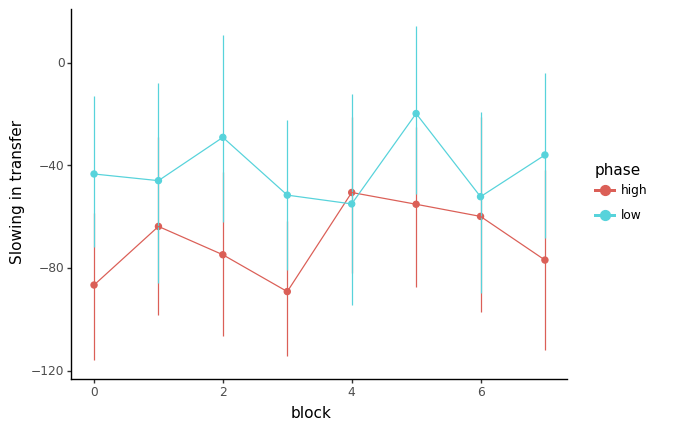

<ggplot: (150137586679)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_speedlossOverBlock.png


In [20]:
g.data = diff_dat_block
g += gg.aes(x='block')
print(g)
g.save(os.path.join(plot_dir, '103_speedlossOverBlock.png'))

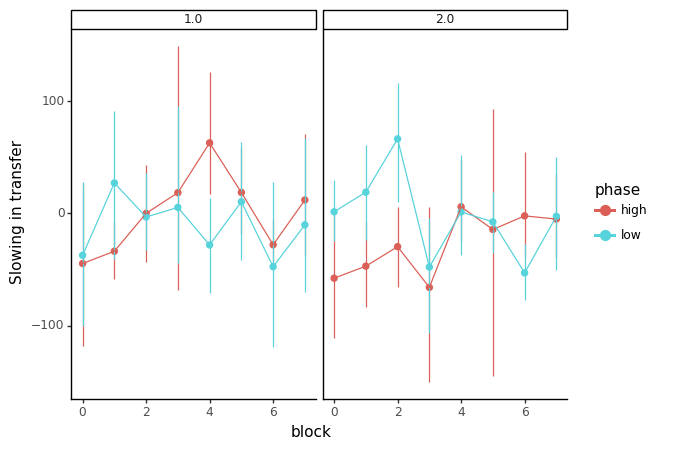

<ggplot: (150137586679)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_transferSlowingOverBlockByStar.png


In [21]:
block_dat_ = all_data.groupby(['sid', 'block', 'phase', 'trial_type', 'goal_star']).aggregate('mean').reset_index()
diff_dat_block_star = get_diff_dat(block_dat_, ['block', 'goal_star'])

g += gg.facet_grid('~ goal_star')
g.data = diff_dat_block_star
print(g)
g.save(os.path.join(plot_dir, '103_transferSlowingOverBlockByStar.png'))

## Collect the wrong star

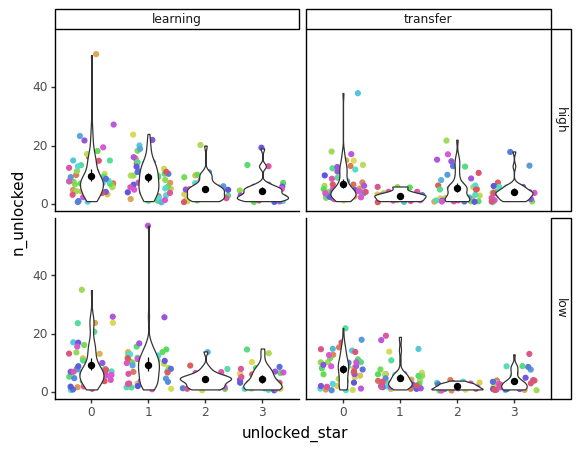

<ggplot: (150136741386)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_CollectingWrongStar.png


In [22]:
# Get data
id_cols = ['sid', 'phase', 'trial_type', 'unlocked_star']
sub_dat = all_data.loc[all_data.correct == 0].reset_index()
sum_dat = sub_dat.groupby(id_cols).count().reset_index()[id_cols + ['index']]
sum_dat = sum_dat.rename(columns={'index': 'n_unlocked'})
sum_dat.loc[np.isnan(sum_dat.n_unlocked), 'n_unlocked'] = 0

# Plot
g = (gg.ggplot(sum_dat, gg.aes('unlocked_star', 'n_unlocked', group='unlocked_star'))
     + gg.geom_point(gg.aes(color='factor(sid)'), position='jitter')
#          + gg.stat_summary(geom='bar')
     + gg.geom_violin()
     + gg.stat_summary()
     + gg.theme(legend_position='none')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '103_CollectingWrongStar.png'))

## First vs second star

Compare the same repetition between the star presented first and the star presented second -> in high transfer, the second star does not benefit from the first, but in low transfer, it does

In [23]:
sub_dat = all_data.loc[(all_data['trial_type'] == 'transfer')]
# sub_dat.loc[(sub_dat['star_iteration'] == 0) & ()]
sub_dat[interesting_cols]

,trial_type,phase,block,trial,trial_,subtrial,points,rt,action_id,action_name,middle_item,middle_item_name,goal_star,goal_star_name,correct,unlocked_star,unlocked_star_name,timeout,star_iteration,chance_performer
2400,transfer,high,0.0,0.0,0.0,0.0,150.0,310.920,1.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
2401,transfer,high,0.0,0.0,0.0,1.0,150.0,89.190,2.0,P,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
2402,transfer,high,0.0,0.0,0.0,2.0,150.0,317.335,3.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
2403,transfer,high,0.0,0.0,0.0,3.0,150.0,76.870,0.0,U,3.0,3.0,1.0,3.0,NaN,-1.0,-1.0,NaN,0.0,False
2404,transfer,high,0.0,1.0,1.0,0.0,150.0,730.635,0.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290971,transfer,low,7.0,23.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
290972,transfer,low,7.0,24.0,199.0,0.0,66.0,884.860,3.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,True
290973,transfer,low,7.0,24.0,199.0,1.0,66.0,203.660,1.0,P,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,True
290974,transfer,low,7.0,24.0,199.0,2.0,66.0,262.600,2.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,True


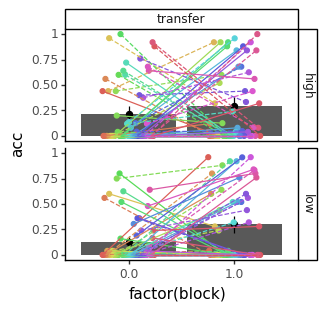

<ggplot: (150136778057)>

In [24]:
subj_dat = sub_dat.loc[sub_dat['block'].isin([0, 1])].groupby(
    ['sid', 'block', 'trial_type', 'phase']).aggregate('mean').reset_index()

gg.options.figure_size = (3, 3)
g = (gg.ggplot(subj_dat, gg.aes('factor(block)', 'acc'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(position=gg.position_dodge(width=0.9))
     + gg.geom_point(gg.aes(color='factor(sid)'), position=gg.position_dodge(width=0.5))
     + gg.geom_line(gg.aes(color='factor(sid)', group='factor(sid)', linetype='factor(goal_star)'), position=gg.position_dodge(width=0.5))
     + gg.theme(legend_position='none')
     + gg.facet_grid('phase ~ trial_type')
    )
g

In [25]:
b0 = subj_dat.loc[subj_dat['block'] == 0, ['sid', 'phase', 'trial_type', 'goal_star', 'acc']]
b1 = subj_dat.loc[subj_dat['block'] == 1, ['sid', 'phase', 'trial_type', 'acc']]

merge_dat = pd.merge(b0, b1, on=['sid', 'phase', 'trial_type'], suffixes=['0', '1'])
merge_dat['acc_diff'] = merge_dat['acc1'] - merge_dat['acc0']
merge_dat

,sid,phase,trial_type,goal_star,acc0,acc1,acc_diff
0,13885,high,transfer,1.0,0.440000,0.040000,-0.400000
1,13885,low,transfer,1.0,0.000000,0.960000,0.960000
2,14239,high,transfer,1.0,0.000000,0.000000,0.000000
3,14239,low,transfer,2.0,0.000000,0.041667,0.041667
4,15670,high,transfer,1.0,0.000000,0.120000,0.120000
...,...,...,...,...,...,...,...
107,39508,low,transfer,1.0,0.166667,0.000000,-0.166667
108,39520,high,transfer,1.0,0.000000,0.320000,0.320000
109,39520,low,transfer,1.0,0.240000,0.280000,0.040000
110,39925,high,transfer,2.0,0.880000,0.000000,-0.880000


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


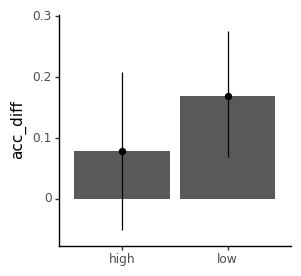

<ggplot: (150137029142)>

In [26]:
g = (gg.ggplot(merge_dat, gg.aes('phase', 'acc_diff'))  #, group='goal_star', fill='factor(goal_star)'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='line', linetype='dotted', position=gg.position_dodge(width=0.9))
     + gg.labs(x='')
    )
g

In [27]:
predictors = [
    '1',
    'phase',
    'phase * goal_star',
]

for pred in predictors:
    mod = smf.mixedlm(formula='acc_diff ~ {}'.format(pred), data=merge_dat, groups=merge_dat['sid']).fit()
    print(mod.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: acc_diff
No. Observations: 112     Method:             REML    
No. Groups:       56      Scale:              0.1952  
Min. group size:  2       Log-Likelihood:     -75.1172
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.124    0.046 2.675 0.007  0.033  0.216
Group Var     0.023    0.074                          

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: acc_diff
No. Observations: 112     Method:             REML    
No. Groups:       56      Scale:              0.1946  
Min. group size:  2       Log-Likelihood:     -76.0857
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0      

In [28]:
id_cols = ['sid', 'trial_type', 'phase']
interest_cols = ['goal_star', 'acc']

b0_dat = sub_dat.loc[
    (sub_dat['subtrial'] == 3) & (sub_dat['block'] == 0),
    id_cols + interest_cols
].groupby(id_cols).aggregate('mean').reset_index()
b1_dat = sub_dat.loc[
    (sub_dat['subtrial'] == 3) & (sub_dat['block'] == 1),
    id_cols + interest_cols
].groupby(id_cols).aggregate('mean').reset_index()
b0_dat

,sid,trial_type,phase,goal_star,acc
0,13885,transfer,high,1.0,0.440000
1,13885,transfer,low,1.0,0.000000
2,14239,transfer,high,1.0,0.000000
3,14239,transfer,low,2.0,0.000000
4,15670,transfer,high,1.0,0.000000
...,...,...,...,...,...
107,39508,transfer,low,1.0,0.166667
108,39520,transfer,high,1.0,0.000000
109,39520,transfer,low,1.0,0.240000
110,39925,transfer,high,2.0,0.880000


In [29]:
iteration_dat = pd.merge(b0_dat, b1_dat, on=id_cols, suffixes=['_block0', '_block1'])
iteration_dat['acc1_minus_acc0'] = iteration_dat['acc_block1'] - iteration_dat['acc_block0']
iteration_dat

,sid,trial_type,phase,goal_star_block0,acc_block0,goal_star_block1,acc_block1,acc1_minus_acc0
0,13885,transfer,high,1.0,0.440000,2.0,0.040000,-0.400000
1,13885,transfer,low,1.0,0.000000,2.0,0.960000,0.960000
2,14239,transfer,high,1.0,0.000000,2.0,0.000000,0.000000
3,14239,transfer,low,2.0,0.000000,1.0,0.041667,0.041667
4,15670,transfer,high,1.0,0.000000,2.0,0.120000,0.120000
...,...,...,...,...,...,...,...,...
107,39508,transfer,low,1.0,0.166667,2.0,0.000000,-0.166667
108,39520,transfer,high,1.0,0.000000,2.0,0.320000,0.320000
109,39520,transfer,low,1.0,0.240000,2.0,0.280000,0.040000
110,39925,transfer,high,2.0,0.880000,1.0,0.000000,-0.880000


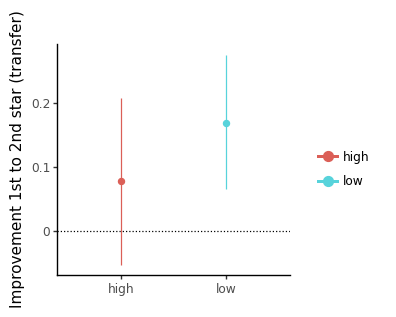

<ggplot: (150136862642)>

In [30]:
# I would have expected:
    # NO learning in high, because 2-key sequences stay the same, and what was learned for one star does not help the other
    # LOTS of learning in low, because both stars rely on 2-key sequence c, which changes; so if it's learned for the first star, it should help the second
# But that's not what we see:
    # High and low differ when star 2 is presented first, but not when star 1 is presented first
    # Why?
g = (gg.ggplot(iteration_dat, gg.aes('phase', 'acc1_minus_acc0', color='factor(phase)'))
     + gg.stat_summary()
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.labs(x='', y='Improvement 1st to 2nd star (transfer)', color='')
#      + gg.facet_grid('~ goal_star_block0', labeller='label_both')
    )
g

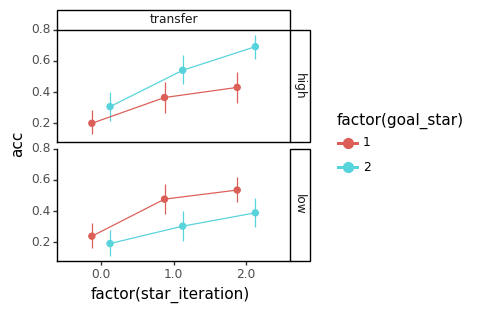

<ggplot: (150136341456)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\103_accOverStariteration.png


In [31]:
# Every star gets better over time
subj_dat = sub_dat.groupby(['sid', 'goal_star', 'star_iteration', 'phase', 'trial_type']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('factor(star_iteration)', 'acc', color='factor(goal_star)', group='factor(goal_star)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.5))
     + gg.stat_summary(position=gg.position_dodge(width=0.5), geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '103_accOverStariteration.png'))